<a href="https://colab.research.google.com/github/vcetonurface/junkprograms/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [155]:
import pandas as pd


In [184]:
airline = pd.read_excel("/content/Data_Train.xlsx")

In [183]:
airline

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


# Filling up the missing values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


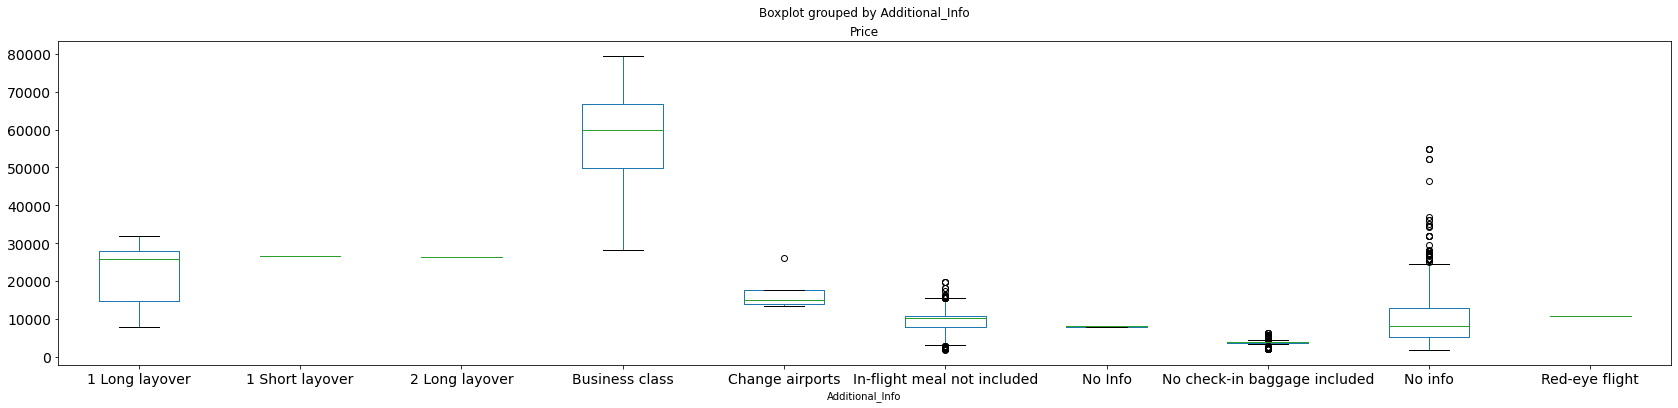

In [172]:
airline.boxplot(by ='Additional_Info', column =['Price'], grid = False,figsize=(28, 6)).tick_params(axis='both', labelsize=14)

In [173]:
for i in range(0,len(airline)):
  if airline['Additional_Info'].iloc[i].lower() == "No info".lower():
    if airline['Price'].iloc[i] >= 29000:
      airline['Additional_Info'].iloc[i]= "Business class"
    if airline['Price'].iloc[i] >= 13000 and airline['Price'].iloc[i] <29000:
      airline['Additional_Info'].iloc[i]= "1 Long layover"
    if airline['Price'].iloc[i] < 13000 and airline['Price'].iloc[i] >7000:
      airline['Additional_Info'].iloc[i]= "In-flight meal not included"
    if airline['Price'].iloc[i] < 7000:
      airline['Additional_Info'].iloc[i]= "No check-in baggage included"


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


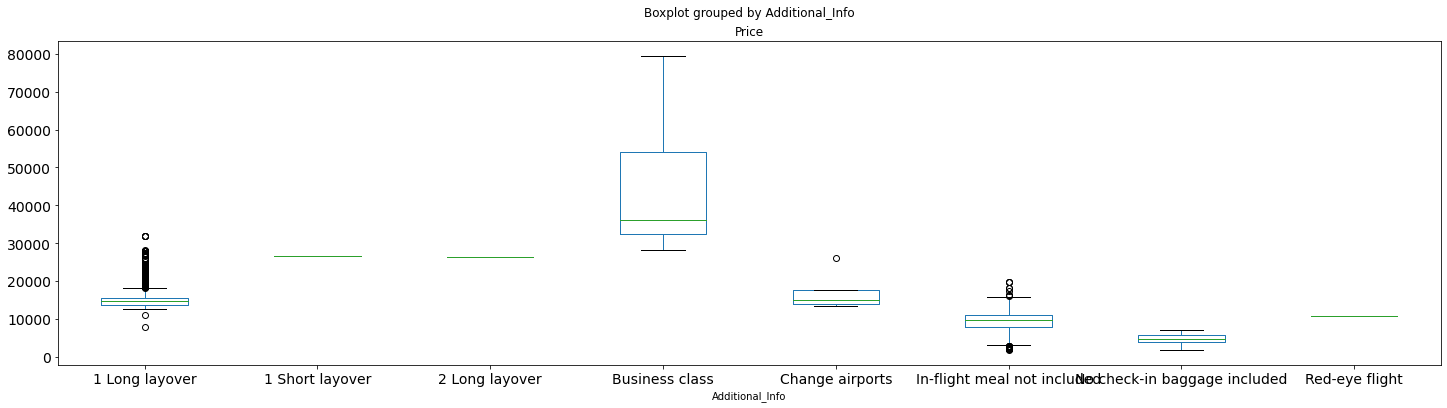

In [174]:
airline.boxplot(by ='Additional_Info', column =['Price'], grid = False,figsize=(24, 6)).tick_params(axis='both', labelsize=14)

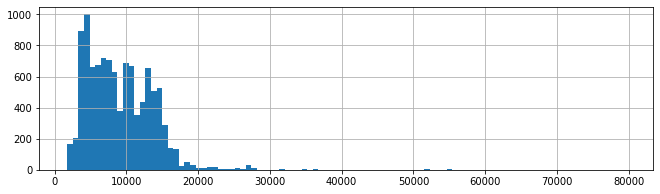

In [175]:
airline[airline.Price<100000].Price.hist(bins=100, figsize=(11,3))

# REMOVE MISSING VALUES

In [176]:
print(airline.isnull().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [177]:
airline.dropna(inplace=True)

# Encoding of text or categorical values

In [185]:

# EDA
airline["Journey_day"] = pd.to_datetime(airline.Date_of_Journey, format="%d/%m/%Y").dt.day
airline["Journey_month"] = pd.to_datetime(airline["Date_of_Journey"], format = "%d/%m/%Y").dt.month
airline.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
airline["Dep_hour"] = pd.to_datetime(airline["Dep_Time"]).dt.hour
airline["Dep_min"] = pd.to_datetime(airline["Dep_Time"]).dt.minute
airline.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
airline["Arrival_hour"] = pd.to_datetime(airline.Arrival_Time).dt.hour
airline["Arrival_min"] = pd.to_datetime(airline.Arrival_Time).dt.minute
airline.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(airline["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
airline["Duration_hours"] = duration_hours
airline["Duration_mins"] = duration_mins
airline.drop(["Duration"], axis = 1, inplace = True)
# Categorical data
Airline = pd.get_dummies(airline["Airline"], drop_first= True)
Source = pd.get_dummies(airline["Source"], drop_first= True)
Destination = pd.get_dummies(airline["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
airline.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
airline.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> airline + Airline + Source + Destination
newairline = pd.concat([airline, Airline, Source, Destination], axis = 1)

newairline.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [186]:
newairline

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(newairline, test_size = 0.2, random_state = 1)

In [190]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_df= scaler.fit_transform(x_train)
scaled_df

array([[0.66666667, 0.11072242, 0.42307692, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.14899747, 0.30769231, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.06022919, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.06022919, 0.65384615, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.15937649, 0.42307692, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03408229, 0.        , ..., 0.        , 0.        ,
        0.        ]])